In [710]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.preprocessing import MinMaxScaler


dataPath = "/content/drive/MyDrive/ML/tom_data_cleaned.csv"

data = pd.read_csv(dataPath, index_col=0)

Select feature columns. We will use the entire dataset here. 

In [711]:
#train the model on all data
df = data

feature_cols =  ['AGE_ABOVE65', 'DISEASE GROUPING 1',
       'DISEASE GROUPING 2', 'DISEASE GROUPING 3', 'DISEASE GROUPING 4',
       'DISEASE GROUPING 5', 'DISEASE GROUPING 6', 'HTN', 'IMMUNOCOMPROMISED',
       'OTHER', 'ALBUMIN_MEAN', 'BE_ARTERIAL_MEAN', 'BE_VENOUS_MEAN',
       'BIC_ARTERIAL_MEAN', 'BIC_VENOUS_MEAN', 'BILLIRUBIN_MEAN',
       'CALCIUM_MEAN', 'CREATININ_MEAN', 'FFA_MEAN', 'GGT_MEAN',
       'GLUCOSE_MEAN', 'HEMATOCRITE_MEAN', 'HEMOGLOBIN_MEAN', 'INR_MEAN',
       'LACTATE_MEAN', 'LEUKOCYTES_MEAN', 'LINFOCITOS_MEAN',
       'NEUTROPHILES_MEAN', 'P02_ARTERIAL_MEAN', 'P02_VENOUS_MEAN',
       'PC02_ARTERIAL_MEAN', 'PC02_VENOUS_MEAN', 'PCR_MEAN',
       'PH_ARTERIAL_MEAN', 'PH_VENOUS_MEAN', 'PLATELETS_MEAN',
       'POTASSIUM_MEAN', 'SAT02_ARTERIAL_MEAN', 'SAT02_VENOUS_MEAN',
       'SODIUM_MEAN', 'TGO_MEAN', 'TGP_MEAN', 'TTPA_MEAN', 'UREA_MEAN',
       'DIMER_MEAN', 'BLOODPRESSURE_DIASTOLIC_MEAN',
       'BLOODPRESSURE_SISTOLIC_MEAN', 'HEART_RATE_MEAN',
       'RESPIRATORY_RATE_MEAN', 'TEMPERATURE_MEAN', 'OXYGEN_SATURATION_MEAN',
       'BLOODPRESSURE_DIASTOLIC_MEDIAN', 'BLOODPRESSURE_SISTOLIC_MEDIAN',
       'HEART_RATE_MEDIAN', 'RESPIRATORY_RATE_MEDIAN', 'TEMPERATURE_MEDIAN',
       'OXYGEN_SATURATION_MEDIAN', 'BLOODPRESSURE_DIASTOLIC_MIN',
       'BLOODPRESSURE_SISTOLIC_MIN', 'HEART_RATE_MIN', 'RESPIRATORY_RATE_MIN',
       'TEMPERATURE_MIN', 'OXYGEN_SATURATION_MIN',
       'BLOODPRESSURE_DIASTOLIC_MAX', 'BLOODPRESSURE_SISTOLIC_MAX',
       'HEART_RATE_MAX', 'RESPIRATORY_RATE_MAX', 'TEMPERATURE_MAX',
       'OXYGEN_SATURATION_MAX', 'BLOODPRESSURE_DIASTOLIC_DIFF',
       'BLOODPRESSURE_SISTOLIC_DIFF', 'HEART_RATE_DIFF',
       'RESPIRATORY_RATE_DIFF', 'TEMPERATURE_DIFF', 'OXYGEN_SATURATION_DIFF',
       'BLOODPRESSURE_DIASTOLIC_DIFF_REL', 'BLOODPRESSURE_SISTOLIC_DIFF_REL',
       'HEART_RATE_DIFF_REL', 'RESPIRATORY_RATE_DIFF_REL',
       'TEMPERATURE_DIFF_REL', 'OXYGEN_SATURATION_DIFF_REL','age_mapped','GENDER_0', 'GENDER_1']

#feature_cols =  ['RESPIRATORY_RATE_DIFF', 'BLOODPRESSURE_DIASTOLIC_MEDIAN', 'LACTATE_MEAN', 'TEMPERATURE_DIFF', 'LINFOCITOS_MEAN', 'PCR_MEAN', 'P02_VENOUS_MEAN', 'HTN', 'SODIUM_MEAN', 'NEUTROPHILES_MEAN', 'LEUKOCYTES_MEAN', 'BIC_VENOUS_MEAN', 'CALCIUM_MEAN', 'ALBUMIN_MEAN']

df = df.dropna(axis=0,how='any')

#select the features and labels
X = df[feature_cols]
y = df["ever_icu"]

#split into train/test group
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1)

#scale the data between 0 and 1 to preserve the one-hot-encoding.
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.fit_transform(X_test)

This predictor will use the entire dataset train a predictor to determine if someone will ever need ICU care. 

Accuracy: 0.872651356993737
Precision: 0.9124423963133641
Recall: 0.825


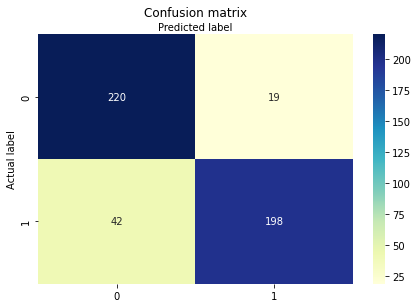

In [712]:
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
import seaborn as sns

clf = MLPClassifier(solver='adam', activation="logistic", alpha=1e-10, hidden_layer_sizes=(10,8,2), random_state=1, max_iter = 10000)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test,y_pred)

class_names=["Need ICU","Do Not Need ICU"]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

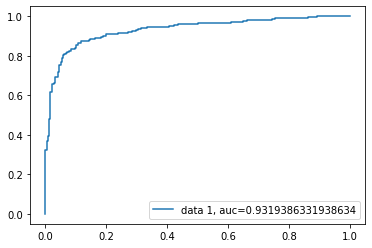

In [713]:
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [714]:
#above model was trained on all data. Lets see how it performs on test data that from only window 0-2. This simulates 
#early detection in a hospital, because normally the hospital wont have time to collect 12 hours of data on a patient before
#making a decision. 

print(np.shape(X_test))

(479, 84)


Lets see how the model performs on data from only the first Window

In [715]:
print(X_test)
print(y_test)

[[1.         0.         0.         ... 0.77777778 1.         0.        ]
 [0.         0.         0.         ... 0.44444444 1.         0.        ]
 [0.         0.         0.         ... 0.33333333 1.         0.        ]
 ...
 [0.         0.         0.         ... 0.11111111 0.         1.        ]
 [0.         0.         0.         ... 0.33333333 1.         0.        ]
 [1.         1.         0.         ... 0.88888889 0.         1.        ]]
48      0
1912    1
223     1
194     1
1858    0
       ..
1599    0
19      0
1888    0
1508    0
1839    1
Name: ever_icu, Length: 479, dtype: int64


Accuracy: 0.8522727272727273
Precision: 0.9285714285714286
Recall: 0.7959183673469388


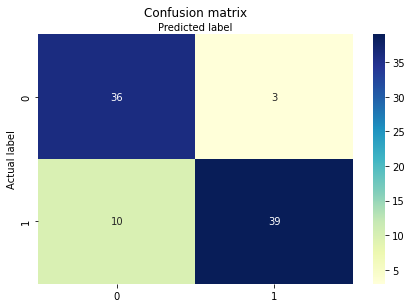

In [716]:
df2 = data
df2 = df2.dropna(axis=0,how='any')
X_train2,X_test2,y_train2,y_test2 = train_test_split(df2,df2,test_size=0.25,random_state=1)

X_test2 = X_test2[X_test2["WINDOW"] == "0-2"]
y_test2 = X_test2["ever_icu"]
X_test2 = X_test2[feature_cols]
X_test2 = min_max_scaler.fit_transform(X_test2)

y_pred2 = clf.predict(X_test2)

cnf_matrix = metrics.confusion_matrix(y_test2,y_pred2)

class_names=["Need ICU","Do Not Need ICU"]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print("Accuracy:",metrics.accuracy_score(y_test2, y_pred2))
print("Precision:",metrics.precision_score(y_test2, y_pred2))
print("Recall:",metrics.recall_score(y_test2, y_pred2))



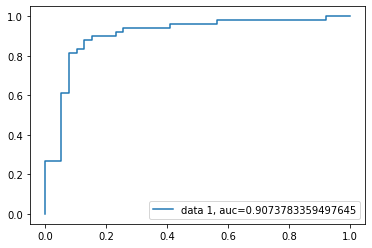

In [717]:
y_pred_proba2 = clf.predict_proba(X_test2)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test2,  y_pred_proba2)
auc = metrics.roc_auc_score(y_test2, y_pred_proba2)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()